In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
directory="C:/Users/Anna Stefania Laino/OneDrive - Newcastle University/Simple_Shieldhall_13.09.22/Desktop/shieldhall_rainfall/1 TANK/data.csv"
#directory="C:/Users/c0070810/OneDrive - Newcastle University/Simple_Shieldhall_13.09.22/Desktop/shieldhall_rainfall/1 TANK/data.csv"

In [3]:
df = pd.read_csv(directory, index_col=0, header=None).T
df = df.iloc[:, :-3]
df

,TIME,BOD31,COD31,BOD1,COD1
1,0.00,17.988837,46.823840,133.151508,251.25
2,0.05,17.988558,46.823167,51.193774,96.60
3,0.10,17.976114,46.799392,51.193774,96.60
4,0.15,17.850559,46.548780,51.193774,96.60
5,0.20,17.438871,45.692247,51.193774,96.60
...,...,...,...,...,...
1198,59.85,7.004930,20.307653,31.479401,59.40
1199,59.90,6.880262,19.972990,31.479401,59.40
1200,59.95,6.768023,19.668087,31.479401,59.40
1201,60.00,6.667285,19.391172,31.479401,59.40


In [4]:
df["LIN_BODe"] = (df["BOD31"] - df["BOD31"].min()) / (df["BOD1"].max() - df["BOD31"].min())
df["LIN_CODe"] = (df["COD31"] - df["COD31"].min()) / (df["COD1"].max() - df["COD31"].min())
df["LIN_BODi"] = (df["BOD1"] - df["BOD31"].min()) / (df["BOD1"].max() - df["BOD31"].min())
df["LIN_CODi"] = (df["COD1"] - df["COD31"].min()) / (df["COD1"].max() - df["COD31"].min())

In [5]:

UTnorm_bod = (50 - df["BOD31"].min()) / (df["BOD1"].max() - df["BOD31"].min())
LTnorm_bod = (25 - df["BOD31"].min()) / (df["BOD1"].max() - df["BOD31"].min())
pred_bod=0.7

UTnorm_cod = (250 - df["COD31"].min()) / (df["COD1"].max() - df["COD31"].min())
LTnorm_cod = (125 - df["COD31"].min()) / (df["COD1"].max() - df["COD31"].min())
pred_cod=0.75

In [6]:
df["UT_bod"]=(UTnorm_bod - df.LIN_BODe)
df["LT_bod"]=(LTnorm_bod - df.LIN_BODe)
df["pbod"]=-(pred_bod* df.LIN_BODi) + df.LIN_BODi - df.LIN_BODe

df["MAX1"]=df[['LT_bod','pbod']].max(axis=1)
df["c_bod"]=df[['MAX1','UT_bod']].min(axis=1)

df["UT_cod"]=(UTnorm_cod -df.LIN_CODe)
df["LT_cod"]=(LTnorm_cod - df.LIN_CODe)
df["pcod"]=-(pred_cod * df.LIN_CODi) + df.LIN_CODi- df.LIN_CODe

df["MAX2"]=df[['LT_cod','pcod']].max(axis=1)
df["c_cod"]=df[['MAX2','UT_cod']].min(axis=1)


df["c"] = df[['c_cod','c_bod']].min(axis=1)
df

,TIME,BOD31,COD31,BOD1,COD1,LIN_BODe,LIN_CODe,LIN_BODi,LIN_CODi,UT_bod,LT_bod,pbod,MAX1,c_bod,UT_cod,LT_cod,pcod,MAX2,c_cod,c
1,0.00,17.988837,46.823840,133.151508,251.25,0.030588,0.039665,0.341728,0.335246,0.086486,0.018942,0.071930,0.071930,0.071930,0.293773,0.113035,0.044146,0.113035,0.113035,0.071930
2,0.05,17.988558,46.823167,51.193774,96.60,0.030587,0.039664,0.120299,0.111637,0.086487,0.018943,0.005503,0.018943,0.018943,0.293774,0.113036,-0.011755,0.113036,0.113036,0.018943
3,0.10,17.976114,46.799392,51.193774,96.60,0.030554,0.039630,0.120299,0.111637,0.086520,0.018977,0.005536,0.018977,0.018977,0.293809,0.113071,-0.011721,0.113071,0.113071,0.018977
4,0.15,17.850559,46.548780,51.193774,96.60,0.030214,0.039267,0.120299,0.111637,0.086859,0.019316,0.005875,0.019316,0.019316,0.294171,0.113433,-0.011358,0.113433,0.113433,0.019316
5,0.20,17.438871,45.692247,51.193774,96.60,0.029102,0.038029,0.120299,0.111637,0.087972,0.020428,0.006988,0.020428,0.020428,0.295409,0.114671,-0.010120,0.114671,0.114671,0.020428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,59.85,7.004930,20.307653,31.479401,59.40,0.000912,0.001325,0.067036,0.057849,0.116162,0.048618,0.019199,0.048618,0.048618,0.332113,0.151375,0.013137,0.151375,0.151375,0.048618
1199,59.90,6.880262,19.972990,31.479401,59.40,0.000575,0.000841,0.067036,0.057849,0.116498,0.048955,0.019535,0.048955,0.048955,0.332597,0.151859,0.013621,0.151859,0.151859,0.048955
1200,59.95,6.768023,19.668087,31.479401,59.40,0.000272,0.000400,0.067036,0.057849,0.116802,0.049258,0.019839,0.049258,0.049258,0.333038,0.152300,0.014062,0.152300,0.152300,0.049258
1201,60.00,6.667285,19.391172,31.479401,59.40,0.000000,0.000000,0.067036,0.057849,0.117074,0.049530,0.020111,0.049530,0.049530,0.333438,0.152700,0.014462,0.152700,0.152700,0.049530


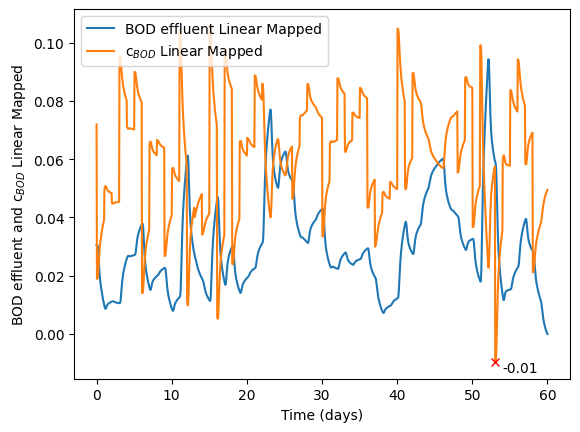

In [7]:
# Make the plot of bod (linear mapping)
plt.plot(df.TIME, df.LIN_BODe,label="BOD effluent Linear Mapped")
plt.plot(df.TIME,df.c_bod,label="c$_{BOD}$ Linear Mapped")
plt.plot(df.TIME[df.c_bod.argmin()] , df.c_bod.min(), marker="x", markeredgecolor="red")
label = "{:.2f}".format(df.c_bod.min())
plt.annotate(label,(df.TIME[df.c_bod.argmin()] , df.c_bod.min()), textcoords="offset points", xytext=(18,-7), ha='center')
plt.xlabel('Time (days)')
plt.ylabel('BOD effluent and c$_{BOD}$ Linear Mapped')
#plt.title('Robustness')
plt.legend(loc="upper left")
#plt.savefig('H:/Downloads/bod&clm.png', dpi=1200)
plt.show()
#as it is the metric chooses always the lt and never the % of removal 

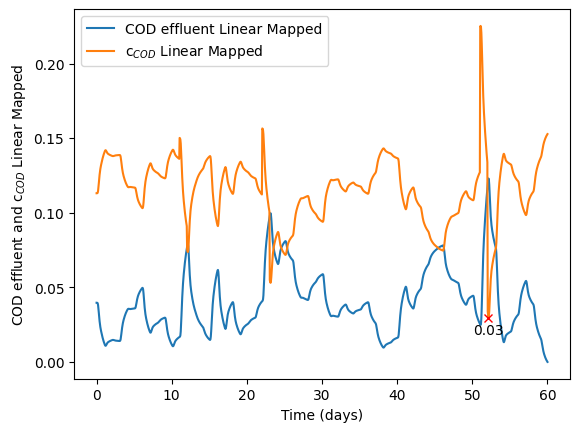

In [8]:
# Make the plot
plt.plot(df.TIME, df.LIN_CODe,label="COD effluent Linear Mapped")
plt.plot(df.TIME,df.c_cod,label="c$_{COD}$ Linear Mapped")
plt.plot(df.TIME[df.c_cod.argmin()] , df.c_cod.min(), marker="x", markeredgecolor="red")
label = "{:.2f}".format(df.c_cod.min())
plt.annotate(label,(df.TIME[df.c_cod.argmin()] , df.c_cod.min()), textcoords="offset points", xytext=(0,-12), ha='center')
plt.xlabel('Time (days)')
plt.ylabel('COD effluent and c$_{COD}$ Linear Mapped')
#plt.title('Robustness')
plt.legend(loc="upper left")
#plt.savefig('H:/Downloads/cod&clm.png', dpi=1200)
plt.show()

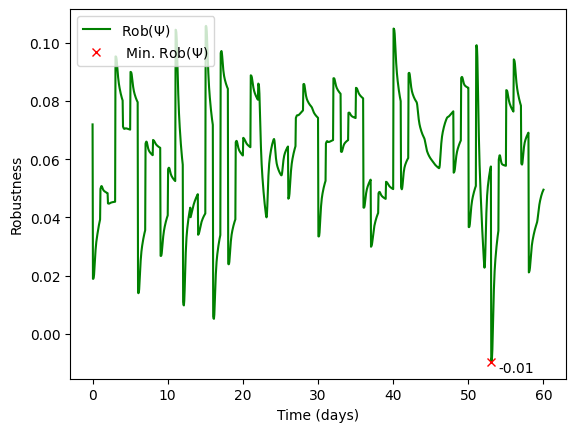

In [9]:


plt.plot(df.TIME, df.c, color="green", label=r"Rob($\Psi$)")
plt.plot(df.TIME[df.c.argmin()], df.c.min(), marker="x", markeredgecolor="red", linestyle="", label=r" Min. Rob($\Psi$)")
label = "{:.2f}".format(df.c.min())

# Annotate the minimum value
plt.annotate(label, (df.TIME[df.c.argmin()], df.c.min()), textcoords="offset points", xytext=(18,-7), ha='center')

plt.xlabel('Time (days)')
plt.ylabel('Robustness')
plt.legend(loc="upper left")
#plt.savefig('H:/Downloads/robustness.png', dpi=1200)
plt.show()


In [ ]:
#Backtransform

In [12]:
# Back transformation for BOD
df["BOD_C_BACK"] = (df["c_bod"]) * (df["BOD1"].max() - df["BOD31"].min()) + df["BOD31"].min()

# Back transformation for COD
df["COD_C_BACK"] = (df["c_cod"]) * (df["COD1"].max() - df["COD31"].min()) + df["COD31"].min()

# Finding the minimum back transformed value and its source
df["MIN_C_BACK"] = df[['BOD_C_BACK', 'COD_C_BACK']].min(axis=1)
df["MIN_C_BACK_SOURCE"] = df[['BOD_C_BACK', 'COD_C_BACK']].idxmin(axis=1)

# Display the DataFrame to see the back-transformed values and identify errors
print(df[["BOD_C_BACK", "COD_C_BACK", "MIN_C_BACK", "MIN_C_BACK_SOURCE"]])




0     BOD_C_BACK  COD_C_BACK  MIN_C_BACK MIN_C_BACK_SOURCE
1      33.291000   97.567332   33.291000        BOD_C_BACK
2      13.678727   97.568005   13.678727        BOD_C_BACK
3      13.691170   97.591779   13.691170        BOD_C_BACK
4      13.816726   97.842392   13.816726        BOD_C_BACK
5      14.228414   98.698924   14.228414        BOD_C_BACK
...          ...         ...         ...               ...
1198   24.662354  124.083518   24.662354        BOD_C_BACK
1199   24.787022  124.418182   24.787022        BOD_C_BACK
1200   24.899262  124.723085   24.899262        BOD_C_BACK
1201   25.000000  125.000000   25.000000        BOD_C_BACK
1202   25.000000  125.000000   25.000000        BOD_C_BACK

[1202 rows x 4 columns]


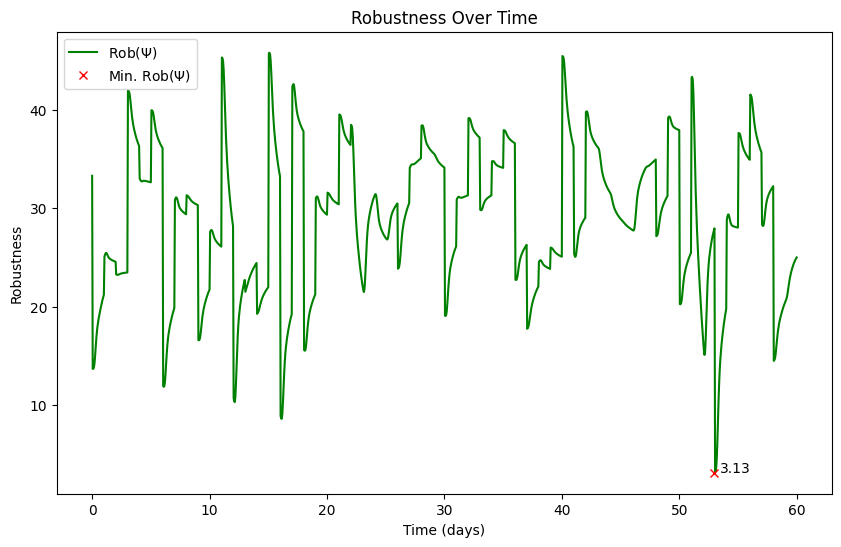

In [13]:

# Create a plot for the back-transformed robustness (MIN_C_BACK)
plt.figure(figsize=(10, 6)) 

plt.plot(df.TIME, df.MIN_C_BACK, color="green", label=r"Rob($\Psi$)")
plt.plot(df.TIME[df.MIN_C_BACK.argmin()], df.MIN_C_BACK.min(), 
         marker="x", markeredgecolor="red", linestyle="", label=r"Min. Rob($\Psi$)")

# Annotate the minimum value
label = "{:.2f}".format(df.MIN_C_BACK.min())
plt.annotate(label, (df.TIME[df.MIN_C_BACK.argmin()], df.MIN_C_BACK.min()), 
             textcoords="offset points", xytext=(15, 0), ha='center')

# Set plot labels and title
plt.xlabel('Time (days)')
plt.ylabel('Robustness')
plt.title('Robustness Over Time')  

# Show legend
plt.legend(loc="upper left")


# Display the plot
plt.show()


In [14]:
# Calculate the minimum of MIN_C_BACK
min_value = df.MIN_C_BACK.min()

# Determine if the minimum comes from BOD_C_BACK or COD_C_BACK
min_source = df.MIN_C_BACK_SOURCE[df.MIN_C_BACK.idxmin()]

print("Minimum value of MIN_C_BACK:", min_value)
print("Source of the minimum value:", min_source)


Minimum value of MIN_C_BACK: 3.131783559743912
Source of the minimum value: BOD_C_BACK
